In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import chainer
mnist = chainer.datasets.get_mnist(ndim=3)[-1] # test data

In [2]:
N = 7

def visualize_bounds(samples, merge_as_color=True):
    plt.close('all')
    print(samples.keys())
    for k, vs in samples.items():
        if 'l' in k and k.replace('l', 'a') in samples:
            continue

        if merge_as_color:
            if vs['normal'].ndim == 1:
                vmin, vmax = np.min(vs['lower']), np.max(vs['upper'])
            else:
                vmin, vmax = 0., 1.
                up_diff = vs['upper']-vs['normal']
                low_diff = vs['normal']-vs['lower']
                merged_v = np.stack([1. - low_diff,
                                     np.ones_like(vs['normal']) - low_diff - up_diff,
                                     1. - up_diff], axis=-1)

                row_size = merged_v.shape[0] // N + 1
                display_activation(merged_v, N, row_size, vmin=vmin, vmax=vmax, label=k + ':range')

            for subk, v in vs.items():
                if v.ndim == 1:
                    v = v.reshape(1, -1, v.shape[0])
                row_size = v.shape[0] // N + 1
                display_activation(v, N, row_size, vmin=vmin, vmax=vmax, label=k + '.' + subk)
        else:
            _vmin, _vmax = np.min(vs['lower']), np.max(vs['upper'])
            for subk, v in vs.items():
                if v.ndim == 1:
                    v = v.reshape(1, -1, v.shape[0])
                    vmin, vmax = _vmin, _vmax
                else:
                    vmin, vmax = 0., 1.
                row_size = v.shape[0] // N + 1
                display_activation(v, N, row_size, vmin=vmin, vmax=vmax, label=k + '.' + subk)
    plt.tight_layout()
    plt.margins(0, 0)

def display_activation(activations, col_size, row_size, vmin=-1, vmax=2, label=None):
    index = 0
    scale = 1.2

    fig = plt.figure(figsize=(row_size*10 * scale, col_size*3.5 * scale * (4./N) ** 3),
                     tight_layout=dict(pad=0))

    fig.subplots_adjust(bottom=-5, left=-5, top=1, right=1, wspace=0)
    for row in range(0, row_size):
        for col in range(0, col_size):
            if index >= activations.shape[0]:
                break
            sub_ax = fig.add_subplot(row_size, col_size, index + 1)
            if index == 0 and label:
                sub_ax.set_title(label)
            if activations[index].ndim == 2:
                sub_ax.imshow(activations[index, :, :], cmap='Greys', interpolation='nearest',
                              vmin=vmin, vmax=vmax)
            else:
                sub_ax.imshow(activations[index, :, :], interpolation='nearest',
                              vmin=vmin, vmax=vmax)
            sub_ax.xaxis.set_ticklabels([]), sub_ax.axes.get_xaxis().set_ticks([])
            sub_ax.yaxis.set_ticklabels([]), sub_ax.axes.get_yaxis().set_ticks([])
            plt.axis('off')
            index += 1

In [3]:
# load a model
from models import SmallerCNN4Visualization
model = SmallerCNN4Visualization(
                   n_class=10,
                   verify=True,
                   warmup_steps=1000000000,
                   rampup_steps=1000000000,
                   normal_loss_weight=1.,
                   epsilon=0.1)

and loss weight is linearly decayed [1.0, 1.0] between [1000000000, 1000000000] iterations,
and epsilon is linearly increased [0.0, 0.1] between [1000000000, 1000000000].


odict_keys(['x', 'l1', 'a1', 'l2', 'a2', 'l3', 'a3', 'y'])


/Users/sos/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


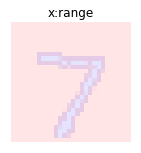

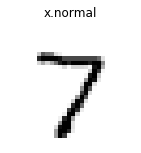

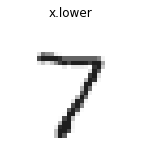

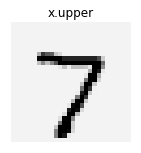

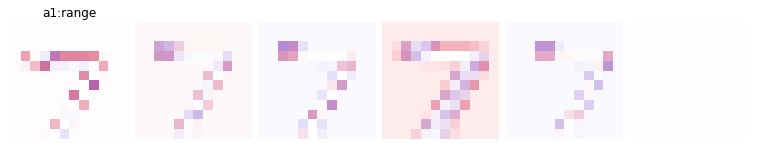

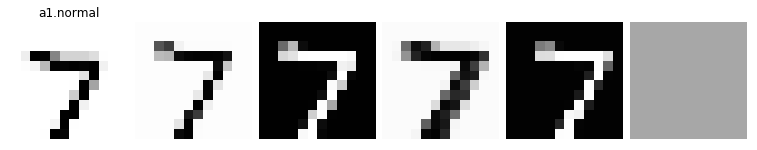

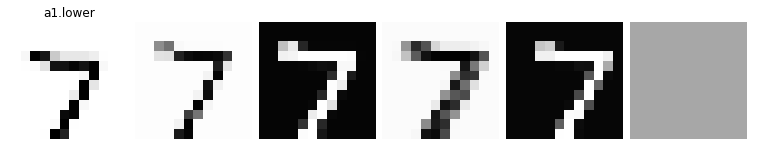

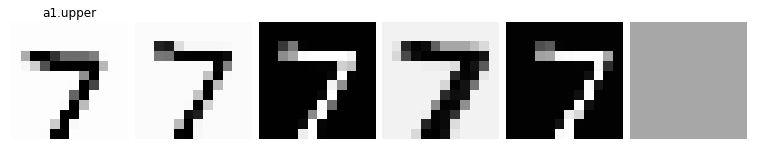

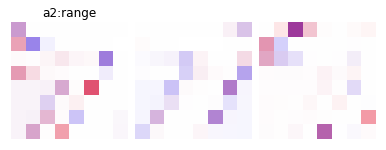

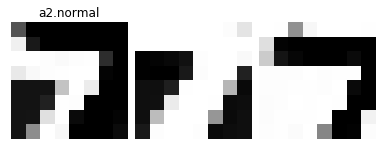

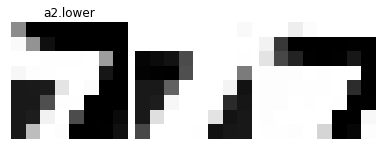

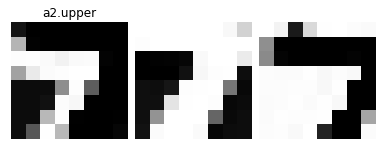

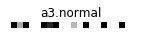

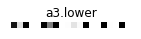

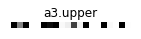

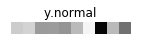

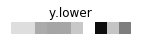

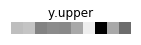

In [4]:
use_ibp_model = True
if use_ibp_model:
    resume_path = 'sample_data/model_files/vissmall_eps01_10000.npz'
else:
    resume_path = 'sample_data/model_files/vissmall_baseline_10000.npz'
chainer.serializers.load_npz(resume_path, model)
EPSILON = 0.1
model.epsilon = EPSILON

# pick an image, predict, and visualize bounds
i = 0 # data index
x, t = mnist[i][0][None], mnist[i][1][None]
samples = model.forward_for_visualization_samples(x, t)
visualize_bounds(samples, True)

odict_keys(['x', 'l1', 'a1', 'l2', 'a2', 'l3', 'a3', 'y'])


/Users/sos/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


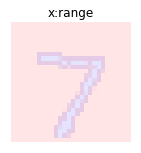

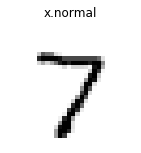

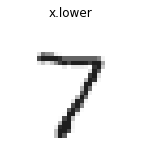

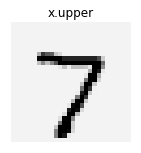

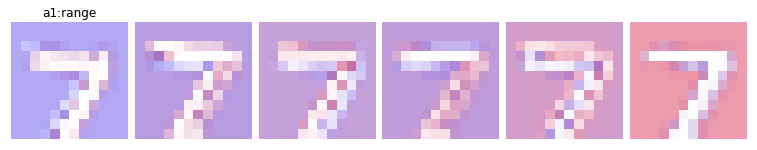

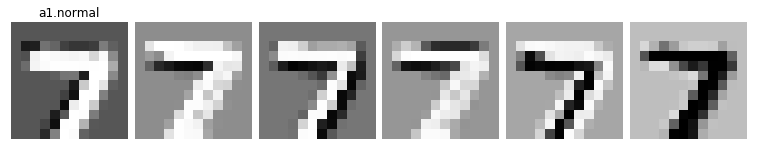

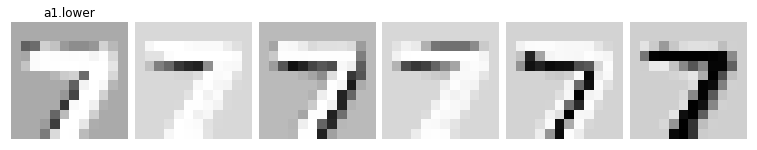

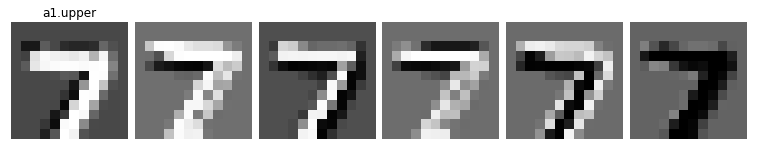

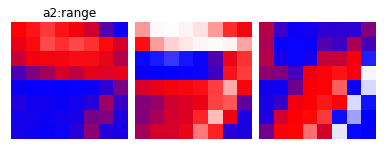

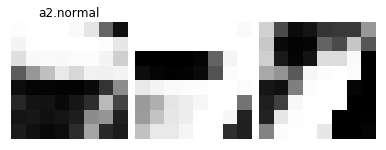

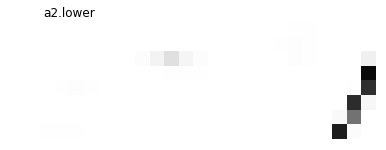

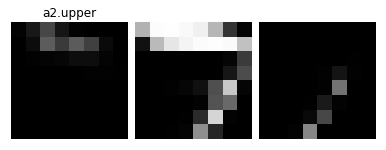

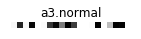

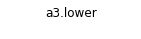

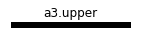

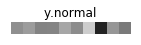

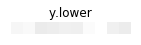

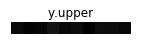

In [5]:
use_ibp_model = False
if use_ibp_model:
    resume_path = 'sample_data/model_files/vissmall_eps01_10000.npz'
else:
    resume_path = 'sample_data/model_files/vissmall_baseline_10000.npz'
chainer.serializers.load_npz(resume_path, model)
EPSILON = 0.1
model.epsilon = EPSILON

# pick an image, predict, and visualize bounds
i = 0 # data index
x, t = mnist[i][0][None], mnist[i][1][None]
samples = model.forward_for_visualization_samples(x, t)
visualize_bounds(samples, True)